## Grover's algorithm on a 3-qubits space using the V-Oracle model


Grover search for state |111>

Import required packages and initialize the least busy backend

In [11]:

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

ibmqfactory.load_account:WARNING:2022-05-27 14:53:35,390: Credentials are already in use. The existing account in the session will be replaced.


Define the registers

In [12]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

Initialise the states

In [13]:
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

Quantum barrier

In [14]:
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

Iteration 1

In [15]:
# Oracle iteration 1
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
# diffuser iteration 1
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])

Iteration 2

In [16]:
# Oracle iteration 2
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
# diffuser iteration 2
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[4], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
# barrier
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])


Measurements

In [17]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

Simulation of the circuit

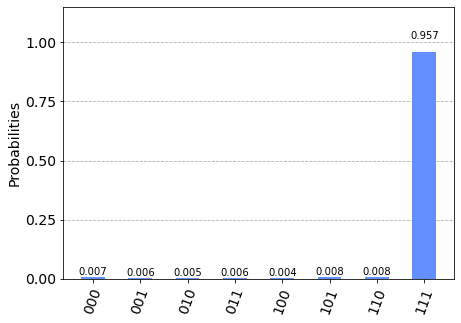

In [18]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Processing of the cicruit on quantum hardware

Job Status: job has successfully run


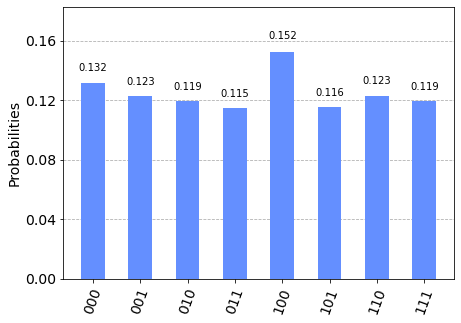

In [19]:
# Run on the least busy backend
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

Visualization of the circuit

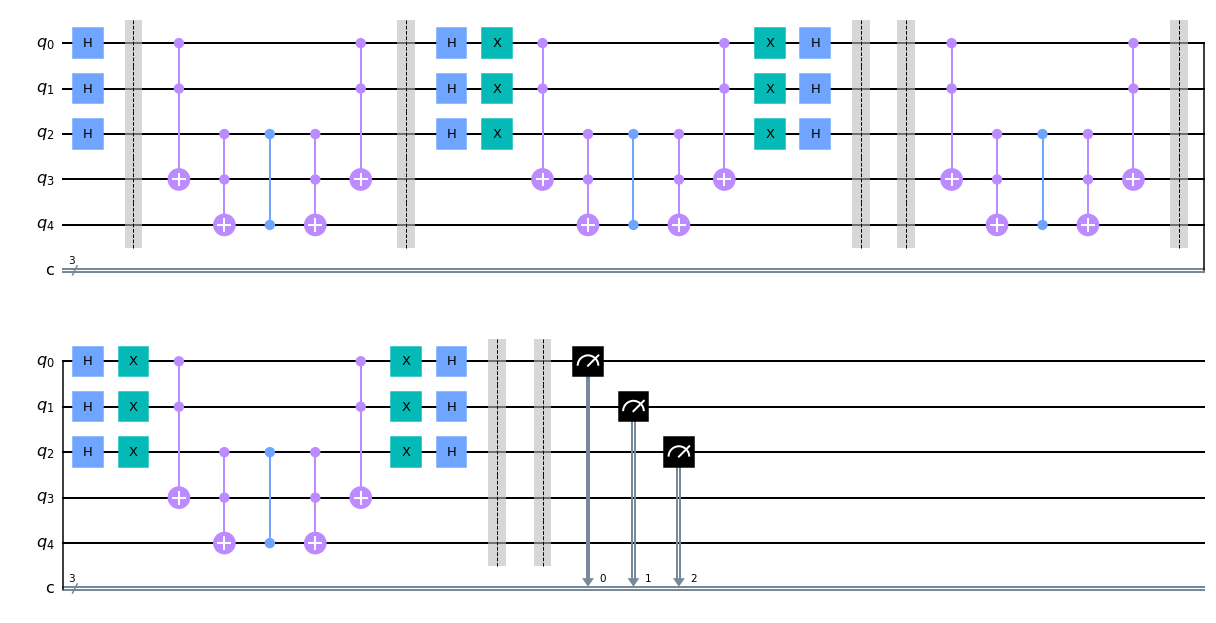

In [20]:
circuit.draw(output="mpl")